# Sales Price Prediction 
## 1. Problem Definition
* To predict the sales based on the advertising in vaious media including TV, Radio and NewsPaper.
## 2. Data
* The Data has been collected from Kaggle (Advertising.csv) - "https://www.kaggle.com/datasets/bumba5341/advertisingcsv"
## 3. Evaluation Metrics
* Evaluation metrics are regression metrics to evaaluate a model like Mean Absolute Error(MAE),Mean Squared Error(MSE),R^2 Score..etc
## 4. Features 
* The given dataset has 4 features
  1. TV
  2. Radio
  3. Newspaper
  4. Sales

### Importing modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sale_data = pd.read_csv("Advertising.csv")
sale_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sale_data.drop(columns="Unnamed: 0",axis=1,inplace=True)
sale_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sale_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking for the null values
sale_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sale_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis(EDA)

In [9]:
corr=sale_data.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation Between Each Features')

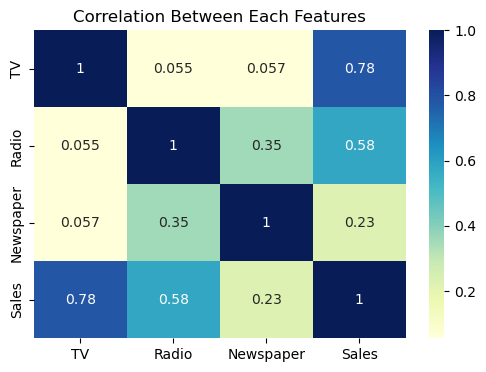

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title("Correlation Between Each Features")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

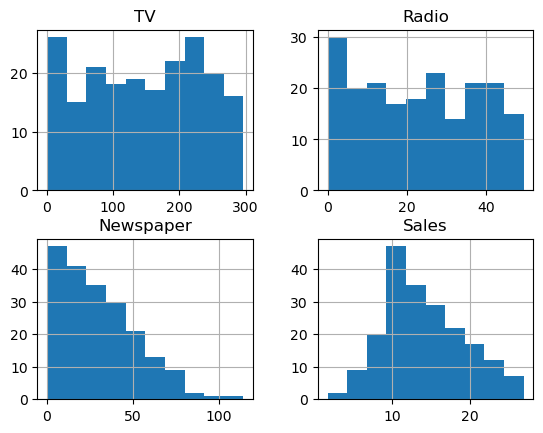

In [12]:
sale_data.hist()

Text(0.5, 0, 'Newspaper advertising Budget')

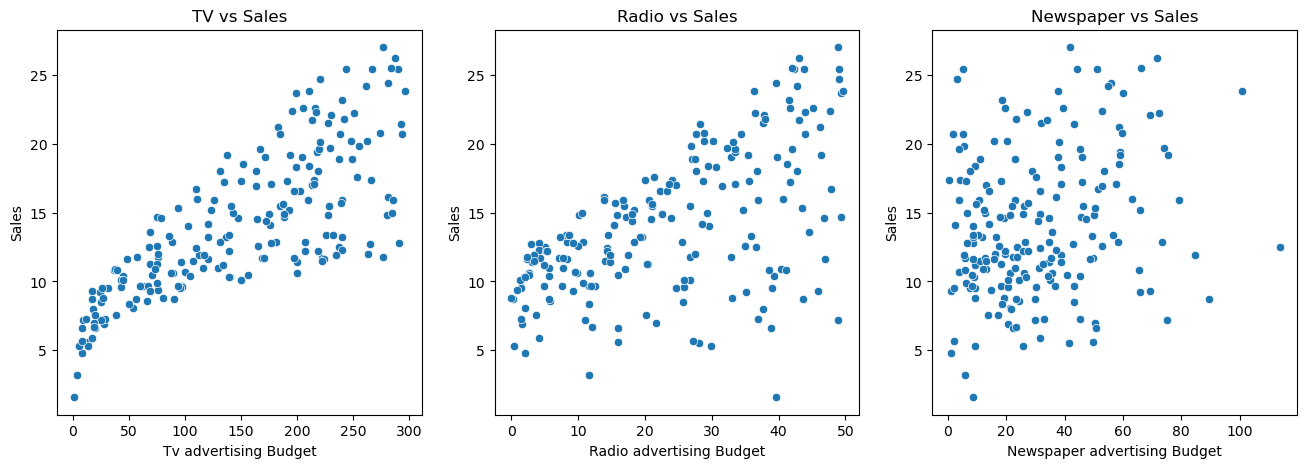

In [28]:
fig,ax=plt.subplots(1,3,figsize=(16,5));
sns.scatterplot(x=sale_data["TV"],y=sale_data["Sales"],ax=ax[0]);
ax[0].set_title("TV vs Sales")
ax[0].set_xlabel("Tv advertising Budget")
sns.scatterplot(x=sale_data["Radio"],y=sale_data["Sales"],ax=ax[1]);
ax[1].set_title("Radio vs Sales")
ax[1].set_xlabel("Radio advertising Budget")
sns.scatterplot(x=sale_data["Newspaper"],y=sale_data["Sales"],ax=ax[2]);
ax[2].set_title("Newspaper vs Sales")
ax[2].set_xlabel("Newspaper advertising Budget")

### Splitting the data into Train and Test Data

In [30]:
from sklearn.model_selection import train_test_split
X = sale_data.drop("Sales",axis=1)
y = sale_data["Sales"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
print("Training data dimension :")
X_train.shape

Training data dimension :


(160, 3)

In [34]:
print("Testing data dimension :")
X_test.shape

Testing data dimension :


(40, 3)

### Model Initialization

In [36]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train,y_train)

RandomForestRegressor()

### Model Evaluation for finding the best model


In [40]:
# Predicting the sales by both the models

y_preds_1 = model_1.predict(X_test)
y_preds_2 = model_2.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Evaluated metrics by Model 1 :")
print("Mean Absolute Error :",mean_absolute_error(y_test,y_preds_1))
print("Mean Squared Error :",mean_squared_error(y_test,y_preds_1))
print("R2 score :",r2_score(y_test,y_preds_1))
print("\n")
print("Evaluated metrics by Model 2 :")
print("Mean Absolute Error :",mean_absolute_error(y_test,y_preds_2))
print("Mean Squared Error :",mean_squared_error(y_test,y_preds_2))
print("R2 score :",r2_score(y_test,y_preds_2))

Evaluated metrics by Model 1 :
Mean Absolute Error : 1.1772021144159956
Mean Squared Error : 2.244024170838273
R2 score : 0.8847735202317715


Evaluated metrics by Model 2 :
Mean Absolute Error : 0.42115000000000136
Mean Squared Error : 0.29405730000000097
R2 score : 0.9849007029561127


#### Therefore, RandomForestRegressor is better model than simple linear regression.
## Predicting the Sales

In [68]:
print("The sales of the testing data :")
y_preds_2

The sales of the testing data :


array([ 8.64 ,  9.606, 10.992,  9.147, 14.259, 10.149, 16.725, 15.329,
       16.492, 15.382, 20.089, 10.939, 12.997, 17.014, 19.342, 15.637,
        9.979, 11.741, 12.371, 20.609,  5.92 , 18.56 , 11.823,  7.884,
       12.178, 12.688, 13.13 ,  7.56 , 15.162, 10.135, 10.976, 22.311,
       11.748, 25.217, 11.957, 12.55 , 10.066, 19.841, 18.526, 13.067])

In [47]:
model_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## HyperParameter Tuning by GridSearchCV


In [63]:
from sklearn.model_selection import GridSearchCV
reg=RandomForestRegressor()
gs_grid = {"n_estimators": [100,200],
           "min_samples_split":[2,4],
           "max_depth":[None],
           "max_features":[1],
           "min_samples_leaf":[1,2,4]
          }
gs_reg = GridSearchCV(param_grid=gs_grid,
                           estimator=reg,
                           cv=5,
                           verbose=5)
gs_reg.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.930 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.898 total time=   0.2s
[CV 3/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   0.2s
[CV 4/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.2s
[CV 5/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.861 total time=   0.2s
[CV 1/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.919 total time=   0.4s
[CV 2/5] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.905 total 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': [1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=5)

In [64]:
gs_reg.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [65]:
gs_preds = rs_reg.predict(X_test)

In [66]:
print("Evaluated metrics by Tuned Model :")
print("Mean Absolute Error :",mean_absolute_error(y_test,gs_preds))
print("Mean Squared Error :",mean_squared_error(y_test,gs_preds))
print("R2 score :",r2_score(y_test,gs_preds))

Evaluated metrics by Tuned Model :
Mean Absolute Error : 1.1249570851151725
Mean Squared Error : 2.0961586794110376
R2 score : 0.8923661390091329


#### The initial model is better than gs_reg

## Knowing the Featue Importance

In [70]:
model_2.feature_importances_

array([0.64841423, 0.34329972, 0.00828605])

In [75]:
# Plotting the feature importances
def plot_features(columns,importances,n=3):
    df=pd.DataFrame({"features":columns,
                     "feature_importances":importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True)
    fig,ax=plt.subplots()
    ax.barh(df["features"],df["feature_importances"])
    ax.set_xlabel("Feature Importance")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

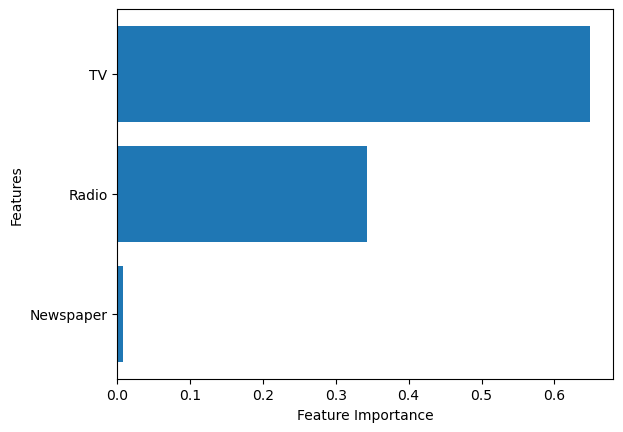

In [76]:
plot_features(X_train.columns,model_2.feature_importances_)

#### Therefore it is concluded that Budject that was spent on advertising in Tv makes the number of sales to increase.